In [31]:
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load dataset
data = pd.read_csv('file.csv')

# Check if there exists a null value in the dataset
print('Null Values In DataFrame: {}\n'.format(data.isna().sum().sum()))

# Check the statistical description of dataset.
data.describe().T[:25]

Null Values In DataFrame: 0



,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
tBodyAcc-std()-Z,10299.0,-0.613064,0.403657,-1.0,-0.979137,-0.850773,-0.278737,1.0
tBodyAcc-mad()-X,10299.0,-0.633593,0.413333,-1.0,-0.993293,-0.948244,-0.302033,1.0
tBodyAcc-mad()-Y,10299.0,-0.525697,0.484201,-1.0,-0.977017,-0.843670,-0.087405,1.0
tBodyAcc-mad()-Z,10299.0,-0.614989,0.399034,-1.0,-0.979064,-0.845068,-0.288149,1.0
tBodyAcc-max()-X,10299.0,-0.466732,0.538707,-1.0,-0.935788,-0.874825,-0.014641,1.0


In [18]:
print(data.shape)
data.head()

(10299, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


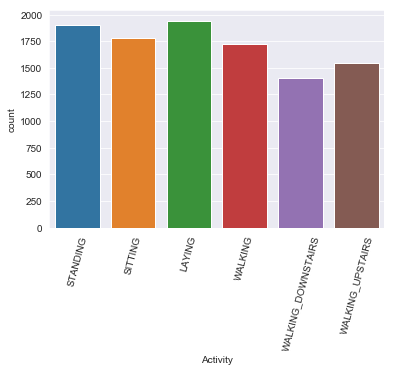

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style(style='darkgrid')

# Store the label values 
label = data['Activity']

# plot the countplot
sns.countplot(x= label)
plt.xticks(rotation=75);

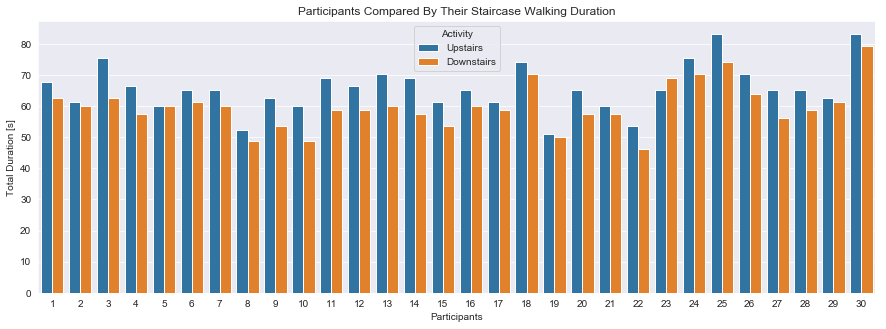

In [21]:
# make the copy of dataset
data_copy = data.copy()

# Create an empty column 
data_copy['duration'] = ''

# Calculate the duration
duration_df = (data_copy.groupby([label[label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])], 'subject'])['duration'].count() * 1.28)
duration_df = pd.DataFrame(duration_df)

# Sort the values of duration
plot_data = duration_df.reset_index().sort_values('duration', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})


# Plot the durations for staircase use
plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='duration', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

In [22]:
#exclude the Activity column and the subject column
feature_cols = data.columns[: -2]   

#Calculate the correlation values
correlated_values = data[feature_cols].corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlation_score'}))


#create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlation_score.abs()

#Picking most correlated features without having self correlated pairs
top_corr_fields = correlated_values.sort_values('Correlation_score', ascending = False).query('abs_correlation>0.8 ')
top_corr_fields = top_corr_fields[top_corr_fields['Feature_1'] != top_corr_fields['Feature_2']].reset_index(drop=True)


In [28]:
top_corr_fields[:25]

,Feature_1,Feature_2,Correlation_score,abs_correlation
0,tBodyAccMag-mad(),tGravityAccMag-mad(),1.0,1.0
1,tBodyAccMag-std(),tGravityAccMag-std(),1.0,1.0
2,tBodyAccMag-mean(),tGravityAccMag-sma(),1.0,1.0
3,tBodyAccMag-mean(),tGravityAccMag-mean(),1.0,1.0
4,tBodyAccMag-mean(),tBodyAccMag-sma(),1.0,1.0
5,tBodyAccMag-max(),tGravityAccMag-max(),1.0,1.0
6,tBodyAccMag-min(),tGravityAccMag-min(),1.0,1.0
7,tBodyAccMag-sma(),tBodyAccMag-mean(),1.0,1.0
8,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.0,1.0
9,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.0,1.0


In [35]:
# importing neccessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score



# Encoding the target variable
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
X = data.iloc[:,:-1]    
y = data.iloc[:,-1]

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("shape of new data ",X_train.shape,X_test.shape )

# Baseline model 
classifier = SVC()
clf = classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision, recall, f_score, _ = error_metric(y_test, y_pred, average = 'weighted')
model1_score = accuracy_score(y_test, y_pred)
print(model1_score)
print(precision, recall, f_score)


shape of new data  (7209, 562) (3090, 562)
0.9540453074433657
0.9539330598676863 0.9540453074433657 0.9539717683576193


In [33]:
# importing libraries
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import LinearSVC

# Feature selection using Linear SVC
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False, random_state=42).fit(X_train, y_train)
model_2 = SelectFromModel(lsvc, prefit=True)
new_train_features = model_2.transform(X_train)
new_test_features = model_2.transform(X_test)

print("shape of new data ",new_train_features.shape,new_test_features.shape )

# model building on reduced set of features
classifier_2 = SVC()
clf_2 = classifier_2.fit(new_train_features, y_train)
y_pred_new = clf_2.predict(new_test_features)
model2_score =accuracy_score(y_test, y_pred_new)
precision, recall, f_score, _ = error_metric(y_test, y_pred_new, average='weighted')
print(model2_score)
print(precision, recall, f_score)

shape of new data  (7209, 110) (3090, 110)
0.9459546925566343
0.9458126691707023 0.9459546925566343 0.9458659879051475


In [36]:
# Importing Libraries
from sklearn.model_selection import GridSearchCV

# Set the hyperparmeters

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [100, 20, 1, 0.1]
}

# Usage of grid search to select the best hyperparmeters
selector = GridSearchCV(SVC(), parameters, scoring='accuracy') 
selector.fit(new_train_features, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()
    

# Model building after Hyperparameter tuning
classifier_3 = SVC(kernel='rbf', C=100)
clf_3 = classifier_3.fit(new_train_features, y_train)
y_pred_final = clf_3.predict(new_test_features)
model3_score = accuracy_score(y_test, y_pred_final)

print('Accuracy score:', model3_score)



Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.980 (+/-0.005) for {'C': 100, 'kernel': 'linear'}

0.986 (+/-0.006) for {'C': 100, 'kernel': 'rbf'}

0.982 (+/-0.006) for {'C': 20, 'kernel': 'linear'}

0.982 (+/-0.006) for {'C': 20, 'kernel': 'rbf'}

0.984 (+/-0.007) for {'C': 1, 'kernel': 'linear'}

0.936 (+/-0.012) for {'C': 1, 'kernel': 'rbf'}

0.978 (+/-0.008) for {'C': 0.1, 'kernel': 'linear'}

0.781 (+/-0.019) for {'C': 0.1, 'kernel': 'rbf'}

Accuracy score: 0.9838187702265372
